## Step 1: <br>
##### Preparing the data

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full.csv')

In [3]:
def get_percent_of_na(df,num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index,s.values):
        
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent,num,num_of_nulls))
        
    if count !=0:
        print('There are {} columns with NA!'.format(count))
    else:
        print()
        print('There are no columns with NA!')


def get_precent_of_na_df(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls
        

def get_info(df):
    print('Head:')
    print()
    display(df.head())
    print ('-'*120)
    print('Info:')
    print()
    display(df.info())
    print ('-'*120)
    print('Describe:')
    print()
    display(df.describe())
    print ('-'*120)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_precent_of_na_df(df,4))
    print ('-'*120)
    print('Shape:')
    print(df.shape)
    print ('-'*120)
    print('Duplicated:')
    print('We have {} duplicated rows!'.format(df.duplicated().sum()))

In [4]:
for df in (df_train, df_test, df_full):
    get_info(df)

Head:



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


------------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb         

None

------------------------------------------------------------------------------------------------------------------------
Describe:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


------------------------------------------------------------------------------------------------------------------------


,date
count,16860
unique,16860
top,2016-04-04 02:00:00
freq,1



Columns with nulls:


,Missing Values,Percent of Nulls
date,0,0.00
final.output.concentrate_ag,72,0.43
final.output.concentrate_pb,72,0.43
final.output.concentrate_sol,370,2.19
final.output.concentrate_au,71,0.42
...,...,...
secondary_cleaner.state.floatbank5_a_level,85,0.50
secondary_cleaner.state.floatbank5_b_air,85,0.50
secondary_cleaner.state.floatbank5_b_level,84,0.50
secondary_cleaner.state.floatbank6_a_air,103,0.61


------------------------------------------------------------------------------------------------------------------------
Shape:
(16860, 87)
------------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows!
Head:



,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


------------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatban

None

------------------------------------------------------------------------------------------------------------------------
Describe:



,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


------------------------------------------------------------------------------------------------------------------------


,date
count,5856
unique,5856
top,2017-09-12 00:59:59
freq,1



Columns with nulls:


,Missing Values,Percent of Nulls
date,0,0.00
primary_cleaner.input.sulfate,302,5.16
primary_cleaner.input.depressant,284,4.85
primary_cleaner.input.feed_size,0,0.00
primary_cleaner.input.xanthate,166,2.83
primary_cleaner.state.floatbank8_a_air,16,0.27
primary_cleaner.state.floatbank8_a_level,16,0.27
primary_cleaner.state.floatbank8_b_air,16,0.27
primary_cleaner.state.floatbank8_b_level,16,0.27
primary_cleaner.state.floatbank8_c_air,16,0.27


------------------------------------------------------------------------------------------------------------------------
Shape:
(5856, 53)
------------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows!
Head:



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


------------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb         

None

------------------------------------------------------------------------------------------------------------------------
Describe:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


------------------------------------------------------------------------------------------------------------------------


,date
count,22716
unique,22716
top,2016-09-03 11:59:59
freq,1



Columns with nulls:


,Missing Values,Percent of Nulls
date,0,0.00
final.output.concentrate_ag,89,0.39
final.output.concentrate_pb,87,0.38
final.output.concentrate_sol,385,1.69
final.output.concentrate_au,86,0.38
...,...,...
secondary_cleaner.state.floatbank5_a_level,101,0.44
secondary_cleaner.state.floatbank5_b_air,101,0.44
secondary_cleaner.state.floatbank5_b_level,100,0.44
secondary_cleaner.state.floatbank6_a_air,119,0.52


------------------------------------------------------------------------------------------------------------------------
Shape:
(22716, 87)
------------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows!


# Conclusion

Our data contains 3 data sets with 87, 53, 87 columns.
<ol>
    <li>We have missing columns in "df_test" </li>
    <li>We have a lot of NaN, zeros and negative values in every dataset </li>
    <li>We need to change object type to datetime in "date" column </li>
</ol>


##### Data Preprocessing

In [6]:
# check NA
for df in (df_train, df_test, df_full):
    print(df.isna().sum().sum())

30320
2360
36587


Since each sample is taken right after the one before I will use ffill method to fill the NA.
<br> My logic is that if I have a missing info it should be close to the one before.<br>
Another option could be to take the mean from the two closest sample if our NA is between but ffill should be just fine and give us good intution

In [7]:
for df in (df_train, df_test, df_full):
    df.replace(0, np.nan, inplace=True)
    df.fillna(method='ffill', inplace=True)

In [8]:
for df in (df_train, df_test, df_full):
    print(df.isna().sum().sum())

0
0
0


##### Check that recovery is calculated correctly
Using the training set, calculate recovery for the "rougher.output.recovery" feature. Find the MAE between our calculations and the feature values.

In [9]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

- C (rougher.input.concentrate_au) - share of gold in the concentrate after flotation/purification
- F (rougher.input.feed_au) - share of gold in the feed/concentrate before flotation/purification 
- T (rougher.output.tail_au) - share of gold in the rougher tails after flotation/purification

In [10]:
#adding the caculated recovery
df_train['rougher.output.recovery_calc'] = C * (F - T) * 100 / (F * (C - T))

In [11]:
def mae(target_recovery, calculated_recovery):
    return abs(target_recovery - calculated_recovery).sum() / len(target_recovery)

target_recovery = df_train['rougher.output.recovery']
calculated_recovery = df_train['rougher.output.recovery_calc']

mae(target_recovery, calculated_recovery)

61.626515049977414

In [12]:
df_train.drop('rougher.output.recovery_calc', axis=1, inplace=True)

#### Analyze the features not shown in the "df_test" dataset

In [13]:
df_test_cols = list(df_train.columns.difference(df_test.columns))
df_test_cols

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [14]:
#fix datetime columns
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%dT%H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%dT%H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%dT%H:%M:%S')

In [15]:
df_test = df_full[df_full['date'].isin(df_test['date'])]

# Conclusion

Fixed the problem we encountered. Now its time to move on to analyze the data!

# Analyze The Data

Study how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage

In [16]:
df_au_ag_pb = pd.Series(df_full.columns)
list(df_au_ag_pb[df_au_ag_pb.str.contains('au|ag|pb')])

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_au',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_au']

In [17]:
cols = ['rougher.input.feed_au',
                       'rougher.input.feed_ag',
                       'rougher.input.feed_pb',
                       'rougher.output.concentrate_au',
                       'rougher.output.concentrate_ag',
                       'rougher.output.concentrate_pb',
                       'primary_cleaner.output.concentrate_au',
                       'primary_cleaner.output.concentrate_ag',
                       'primary_cleaner.output.concentrate_pb',
                       'final.output.concentrate_au',
                       'final.output.concentrate_ag',
                       'final.output.concentrate_pb']
df_au_ag_pb = df_full[cols]

Plot the boxplots for different stages for "au", "ag", "pb" concentrations

In [18]:
def make_color(col):
    if "_au" in col:
        return 'g'
    elif "_ag" in col:
        return 'b'
    else:
        return 'm'

In [19]:
color = {col:make_color(col) for col in cols}

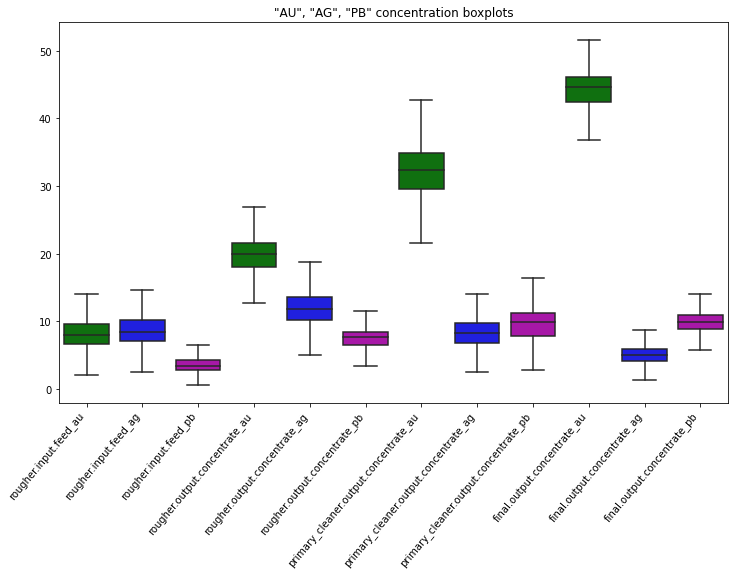

In [20]:
plt.figure(figsize=(12, 7))
plt.title('"AU", "AG", "PB" concentration boxplots')
boxplot_chart = sns.boxplot(data=df_au_ag_pb,
                            showfliers = False, palette=color)
boxplot_chart.set_xticklabels(boxplot_chart.get_xticklabels(),
                              rotation=50,
                              horizontalalignment='right');

Plot the violinplots for different stages for "au", "ag", "pb" concentrations

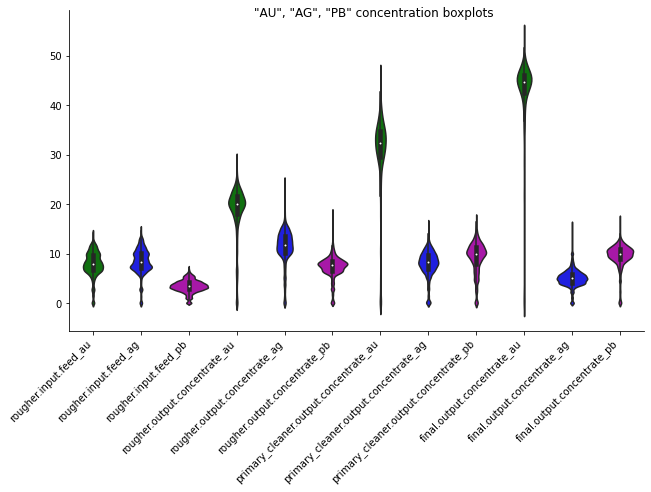

In [21]:
violin_chart = sns.catplot(kind='violin',
                           data=df_au_ag_pb, palette=color)
violin_chart.fig.set_size_inches(12,5)
violin_chart.fig.suptitle('"AU", "AG", "PB" concentration boxplots')
[plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right') for ax in violin_chart.axes.flat];

# Conclusion:

I see that:
- the mean concentration of "AU" is increasing on the every step. 
- the mean concentration of "AG" increased after flotation. But it decreased after purification process.
- the mean concentration of "PB" is increasing on the every step.

#### Compare the feed particle size distributions in the training set and in the test set

In [22]:
df_train_feed_size = df_train['rougher.input.feed_size']
df_test_feed_size = df_test['rougher.input.feed_size']

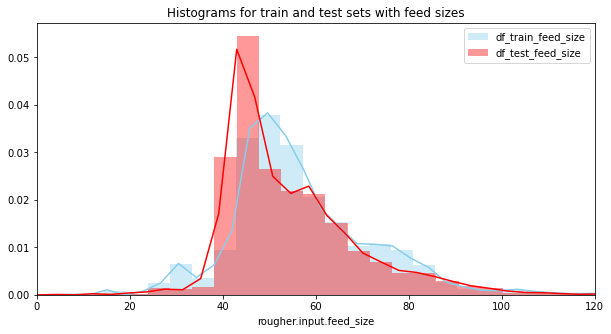

In [23]:
plt.figure(figsize=(10, 5))
plt.xlim(0, 120)
plt.title('Histograms for train and test sets with feed sizes')
sns.distplot(df_train_feed_size,
             bins=100,
             color='skyblue',
             label='df_train_feed_size')
sns.distplot(df_test_feed_size,
             bins=100,
             color='red',
             label='df_test_feed_size')
plt.legend();

#### Consider the total concentrations of all substances at different stages.

In [24]:
dfs = (df_train, df_test)

for df in dfs:
    # create 'rougher.input.substances' column for raw substances concentration
    df.loc[:, 'rougher.input.substances'] = df.loc[:, ['rougher.input.feed_au',
                                'rougher.input.feed_ag',
                                'rougher.input.feed_pb',
                                'rougher.input.feed_sol']].sum(axis=1)

    # create 'rougher.output.substances' column for substances concentraion after flotation
    df.loc[:, 'rougher.output.substances'] = df.loc[:, ['rougher.output.concentrate_au',
                                'rougher.output.concentrate_ag',
                                'rougher.output.concentrate_pb',
                                'rougher.output.concentrate_sol']].sum(axis=1)

    # create 'final.output.substances' column for substances concentraion after purification
    df.loc[:, 'final.output.substances'] = df.loc[:, ['final.output.concentrate_au',
                               'final.output.concentrate_ag',
                               'final.output.concentrate_pb',
                               'final.output.concentrate_sol']].sum(axis=1)

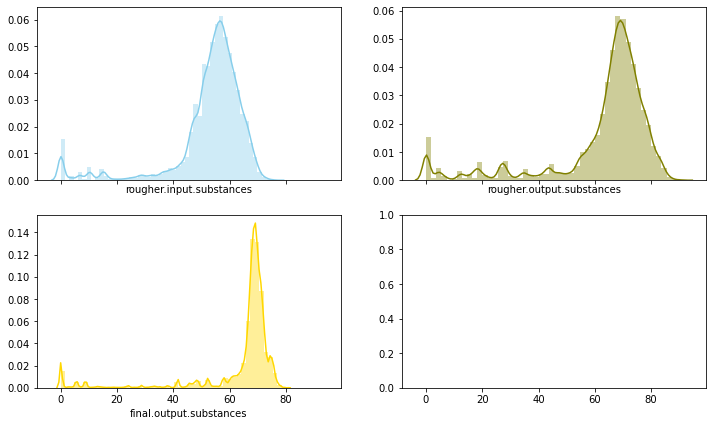

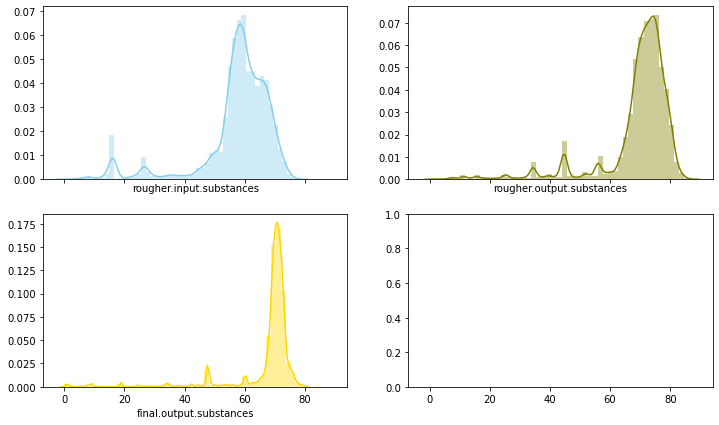

In [25]:
for df in dfs:
    f, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
    sns.distplot(df['rougher.input.substances'], color="skyblue", ax=axes[0, 0])
    sns.distplot(df['rougher.output.substances'], color="olive", ax=axes[0, 1])
    sns.distplot(df['final.output.substances'], color="gold", ax=axes[1, 0]);

In [26]:
# drop some outliers
df_train = df_train[(df_train['rougher.input.substances'] > 10) &
 (df_train['rougher.output.substances'] > 20) &
 (df_train['final.output.substances'] > 10)]

df_test = df_test[(df_test['rougher.input.substances'] > 10) &
 (df_test['rougher.output.substances'] > 20) &
 (df_test['final.output.substances'] > 10)]

In [27]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

for df in (df_train, df_test):
    print(f'duplications for {namestr(df, globals())[0]}: ', df.duplicated().sum())

duplications for df_train:  0
duplications for df_test:  0


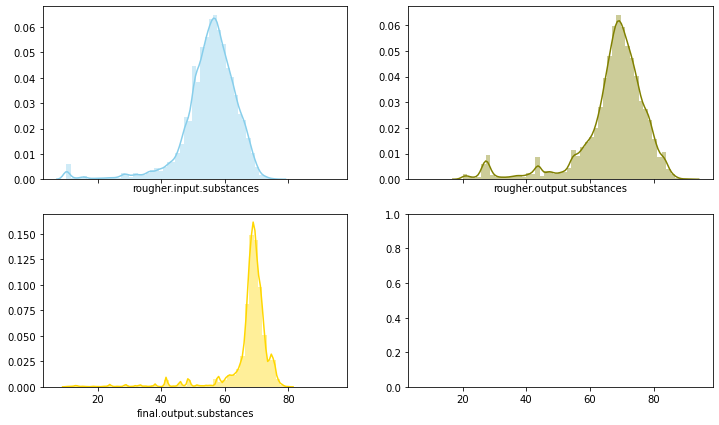

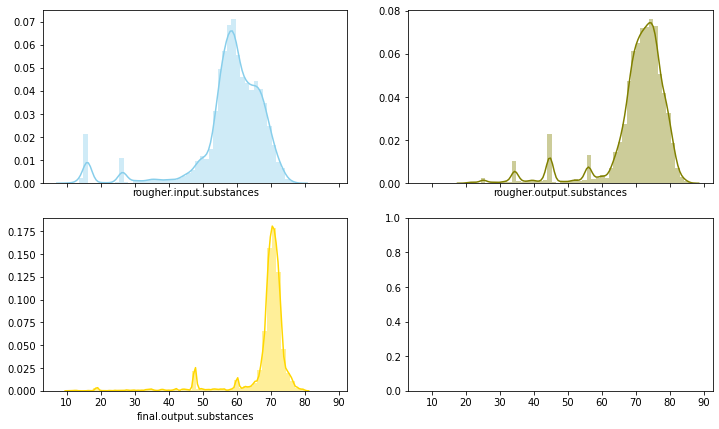

In [28]:
for df in (df_train, df_test):
# plot hists
    f, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
    sns.distplot(df['rougher.input.substances'], color="skyblue", ax=axes[0, 0])
    sns.distplot(df['rougher.output.substances'], color="olive", ax=axes[0, 1])
    sns.distplot(df['final.output.substances'], color="gold", ax=axes[1, 0]);

# Conclusion:

Since I saw that I have similar distributions, std and mean looks fine which is good for our model build.

Also I have cleaned a little the data and dropped outliers

# Model Build

#### Write a function to calculate the final sMAPE value

In [29]:
def smape(y, y_pred, **kwargs):
    return (((abs(y - y_pred) * 2 * 100) /
              (abs(y) + abs(y_pred))).sum()) / len(y)

def full_smape(rougher_smape, final_smape):
    return 0.25 * rougher_smape.item() + 0.75 * final_smape.item()

#### Train different models. Evaluate them using cross-validation

In [30]:
df_cols_for_drop = ['final.output.concentrate_ag',
                        'final.output.concentrate_au',
                        'final.output.concentrate_pb',
                        'final.output.concentrate_sol',
                        'final.output.tail_ag',
                        'final.output.tail_au',
                        'final.output.tail_pb',
                        'final.output.tail_sol',
                        'primary_cleaner.output.concentrate_ag',
                        'primary_cleaner.output.concentrate_au',
                        'primary_cleaner.output.concentrate_pb',
                        'primary_cleaner.output.concentrate_sol',
                        'primary_cleaner.output.tail_ag',
                        'primary_cleaner.output.tail_au',
                        'primary_cleaner.output.tail_pb',
                        'primary_cleaner.output.tail_sol',
                        'rougher.calculation.au_pb_ratio',
                        'rougher.calculation.floatbank10_sulfate_to_au_feed',
                        'rougher.calculation.floatbank11_sulfate_to_au_feed',
                        'rougher.calculation.sulfate_to_au_concentrate',
                        'rougher.output.concentrate_ag',
                        'rougher.output.concentrate_au',
                        'rougher.output.concentrate_pb',
                        'rougher.output.concentrate_sol',
                        'rougher.output.tail_ag',
                        'rougher.output.tail_au',
                        'rougher.output.tail_pb',
                        'rougher.output.tail_sol',
                        'secondary_cleaner.output.tail_ag',
                        'secondary_cleaner.output.tail_au',
                        'secondary_cleaner.output.tail_pb',
                        'secondary_cleaner.output.tail_sol',
                           'rougher.output.substances',
                           'final.output.substances']

In [31]:
df_test = df_test.drop(columns=df_cols_for_drop)
df_train = df_train.drop(columns=df_cols_for_drop)

In [32]:
def feature_target_rougher(df):
    df_cols = pd.Series(df.columns)
    features_1_col = list(df_cols[df_cols.str.contains('rougher.input|rougher.state')])
    features_1 = df[features_1_col]
    
    # scale the data
    scaler = StandardScaler()
    features_1 = scaler.fit_transform(features_1)
    target_1 = df['rougher.output.recovery']
    
    return features_1, target_1

In [33]:
def feature_target_final(df):
    features_2 = df.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
    
    # scale the data
    scaler = StandardScaler()
    features_2 = scaler.fit_transform(features_2)

    target_2 = df['final.output.recovery']
    
    return features_2, target_2

In [34]:
def get_cv_scores(model, target, features):
    my_scorer = make_scorer(smape)
    
    scores = cross_val_score(model,
                             features,
                             target,
                             cv=5,
                             scoring=my_scorer)
    
    return scores.mean()

In [35]:
features_1, target_1 = feature_target_rougher(df_train)
features_2, target_2 = feature_target_final(df_train)

In [36]:
df_train.shape

(15547, 56)

#### Train Models

In [37]:
from collections import defaultdict
d = defaultdict(list)

for depth in range(2, 14):
    # create and train the model
    model_1 = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    model_2 = DecisionTreeRegressor(max_depth=depth, random_state=12345)

    # calculate sMAPE for 'rougher.output.recovery', 'final.output.recovery' and full_smape 
    rougher_smape = get_cv_scores(model_1, target_1, features_1)
    final_smape = get_cv_scores(model_2, target_2, features_2)
    d['rougher_smape'].append(rougher_smape)
    d['final_smape'].append(final_smape)
    d['full_smape'].append(full_smape(rougher_smape, final_smape))
    d['depth'].append(depth)

pd.DataFrame(d).sort_values(by='full_smape')

,rougher_smape,final_smape,full_smape,depth
1,7.660654,10.988483,10.156526,3
0,8.163133,10.989457,10.282876,2
2,7.908559,11.392255,10.521331,4
3,8.307044,11.530962,10.724983,5
4,8.341650,11.780890,10.921080,6
5,9.029924,12.274700,11.463506,7
6,8.972702,13.204929,12.146872,8
7,9.514409,13.491855,12.497494,9
9,9.803376,14.583411,13.388402,11
8,10.820405,14.280883,13.415764,10


The best result with max_depth=3 (full_smape=10.156526)

In [38]:
from collections import defaultdict
random_forest = defaultdict(list)
for estim in range(1, 20):
    # create and train the model
    model_1 = RandomForestRegressor(max_depth=3, n_estimators=estim, random_state=12345)
    model_2 = RandomForestRegressor(max_depth=3, n_estimators=estim, random_state=12345)
    
    rougher_smape = get_cv_scores(model_1, target_1, features_1)
    final_smape = get_cv_scores(model_2, target_2, features_2)
    
    random_forest['rougher_smape'].append(rougher_smape)
    random_forest['final_smape'].append(final_smape)
    random_forest['full_smape'].append(full_smape(rougher_smape, final_smape))
    random_forest['estim'].append(estim)

pd.DataFrame(random_forest).sort_values(by='full_smape')

,rougher_smape,final_smape,full_smape,estim
3,7.317810,10.644438,9.812781,4
4,7.244965,10.700903,9.836919,5
5,7.343608,10.807438,9.941480,6
1,7.372478,10.809432,9.950194,2
6,7.315100,10.840031,9.958798,7
2,7.371662,10.842202,9.974567,3
7,7.370562,10.933900,10.043066,8
12,7.364621,10.940286,10.046370,13
11,7.366947,10.939732,10.046536,12
9,7.324166,10.961658,10.052285,10


Our best result full_smape=9.812781

In [39]:
# create and train the model
model_1 = LinearRegression()
model_2 = LinearRegression()

# calculate sMAPE for 'rougher.output.recovery', 'final.output.recovery' and full_smape 
rougher_smape = get_cv_scores(model_1, target_1, features_1)
final_smape = get_cv_scores(model_2, target_2, features_2)
full_smape_ = full_smape(rougher_smape, final_smape)

# create temp dataframe with metrics
df_lr_temp = pd.Series({'rougher_smape': rougher_smape,
                           'final_smape': final_smape,
                           'full_smape': full_smape_}) 

df_lr_temp

rougher_smape     7.394900
final_smape      12.503911
full_smape       11.226658
dtype: float64

#### Check on test

In [40]:
features_1_test, target_1_test = feature_target_rougher(df_test)
features_2_test, target_2_test = feature_target_final(df_test)

In [41]:
from collections import defaultdict
test_dict = defaultdict(list)

model_1 = RandomForestRegressor(max_depth=3, n_estimators=4, random_state=12345)
model_2 =  RandomForestRegressor(max_depth=3, n_estimators=4, random_state=12345)

model_1.fit(features_1, target_1)
model_2.fit(features_2, target_2)

train_predictions_1 = model_1.predict(features_1_test)
train_predictions_2 = model_2.predict(features_2_test)

# calculate sMAPE for 'rougher.output.recovery', 'final.output.recovery' and full_smape 
test_dict['rougher_smape'].append(smape(target_1_test, train_predictions_1))
test_dict['final_smape'].append(smape(target_2_test, train_predictions_2))
test_dict['full_smape'].append(full_smape(smape(target_1_test, train_predictions_1), smape(target_2_test, train_predictions_2)))

pd.DataFrame(test_dict)

,rougher_smape,final_smape,full_smape
0,6.039317,9.083838,8.322708


# Conclusion:

The model should predict the amount of gold recovered from gold ore.

We have found out that "RandomForestRegressor" with depth=3 and estimators=4 is the best model for our conditions.